In [1]:
import GPy

As of Mon 12th of Oct running on devel branch of GPy 0.8.8

In [2]:
GPy.plotting.change_plotting_library('matplotlib')

# Gaussian process regression tutorial

### Nicolas Durrande 2013
#### with edits by James Hensman and Neil D. Lawrence
#### (and Conor McGrory 2018)

We will see in this tutorial the basics for building a 1 dimensional and a 2 dimensional Gaussian process regression model, also known as a kriging model.

We first import the libraries we will need:

In [3]:
import numpy as np

## 1-dimensional model

For this toy example, we assume we have the following inputs and outputs:

In [4]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Note that the observations Y include some noise.

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

In [5]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

The parameter input_dim stands for the dimension of the input space. The parameters `variance` and `lengthscale` are optional, and default to 1. Many other kernels are implemented, type `GPy.kern.<tab>` to see a list

In [6]:
#type GPy.kern.<tab> here:
GPy.kern.BasisFuncKernel

GPy.kern.src.basis_funcs.BasisFuncKernel

The inputs required for building the model are the observations and the kernel:

In [7]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions `display` and `plot` give an insight of the model we have just built:

In [8]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 /Users/cmcgrory/savin_lab/gp_intro/gp_intro_env/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


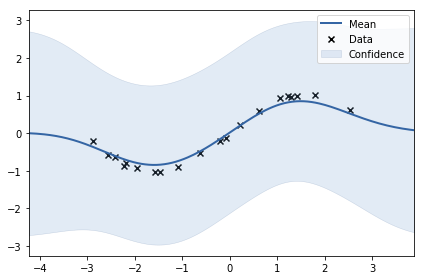

In [9]:
fig = m.plot()

The above cell shows our GP regression model before optimization of the parameters. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling `m.optimize` in GPy:

In [10]:
m.optimize(messages=True)

If we want to perform some restarts to try to improve the result of the optimization, we can use the `optimize_restarts` function. This selects random (drawn from $N(0,1)$) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [11]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -19.144153623382476
Optimization restart 2/10, f = -19.144153623389663
Optimization restart 3/10, f = -19.144153623319497
Optimization restart 4/10, f = -19.144153623108803
Optimization restart 5/10, f = -19.14415362119576
Optimization restart 6/10, f = -19.14415362336899
Optimization restart 7/10, f = -19.14415362317668
Optimization restart 8/10, f = -19.144153623056823
Optimization restart 9/10, f = -19.144153622258543
Optimization restart 10/10, f = -19.144153623346657


In this simple example, the objective function (usually!) has only one local minima, and each of the found solutions are the same. 

Once again, we can use `print(m)` and `m.plot()` to look at the resulting model resulting model. This time, the paraemters values have been optimized agains the log likelihood (aka the log marginal likelihood): the fit shoul dbe much better. 

GP_regression.,value,constraints,priors
rbf.variance,1.1553390224138196,+ve,
rbf.lengthscale,1.7950713408318946,+ve,
Gaussian_noise.variance,0.001396732715319561,+ve,


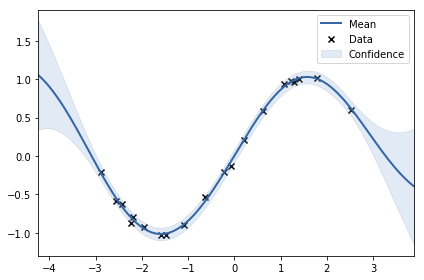

In [12]:
display(m)
fig = m.plot()

### New plotting of GPy 0.9 and later
The new plotting allows you to plot the density of a GP object more fine grained by plotting more percentiles of the distribution color coded by their opacity

GP_regression.,value,constraints,priors
rbf.variance,1.1553390224138196,+ve,
rbf.lengthscale,1.7950713408318946,+ve,
Gaussian_noise.variance,0.001396732715319561,+ve,


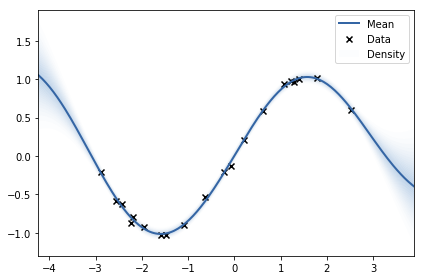

In [13]:
display(m)
fig = m.plot(plot_density=True)